# **Digital Image Processing Fundamentals**
**Libraries**: Install dependencies first (uncomment if needed):  
`!pip install numpy matplotlib pillow opencv-python`

## **1.1 Digital Representation of Images**
**Theory**:  
- Grayscale: 2D array (0=black, 255=white).  
- Color: 3D array (height × width × RGB channels).  
*Reference: Gonzalez & Woods, Chapter 2.*

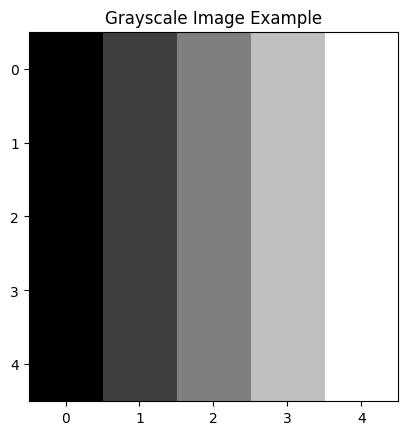

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create a 5x5 grayscale image
gray_image = np.array([
    [0, 63, 127, 191, 255],
    [0, 63, 127, 191, 255],
    [0, 63, 127, 191, 255],
    [0, 63, 127, 191, 255],
    [0, 63, 127, 191, 255]
], dtype=np.uint8)

plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image Example")
plt.show()

**Exercise 1.1**: Create a 10x10 checkerboard pattern.
*Hint*: Use `np.kron`.

## **1.2 Image Formats and Data Structures**
**Theory**:  
- **PNG** (lossless), **JPEG** (lossy), **TIFF** (high quality).  
- Data structures: `PIL.Image` ↔ `numpy.ndarray`.  
*Reference: Burger & Burge, Chapter 1.*

In [6]:
from PIL import Image
import cv2

# Load an image (replace with your file)
image_path = "DSCF0271.jpeg"
try:
    image_pil = Image.open(image_path)
except FileNotFoundError:
    print("Please use a valid image path!")
    image_pil = Image.fromarray(np.random.randint(0,255,(100,100,3), dtype=np.uint8))  # Dummy image

# Convert to NumPy and save as PNG
image_np = np.array(image_pil)
Image.fromarray(image_np).save("sample_converted.png")

print("Image shape:", image_np.shape)
print("Data type:", image_np.dtype)

Image shape: (4160, 6240, 3)
Data type: uint8


**Exercise 1.2**: Convert a color image to grayscale using:
`Y = 0.299*R + 0.587*G + 0.114*B`.

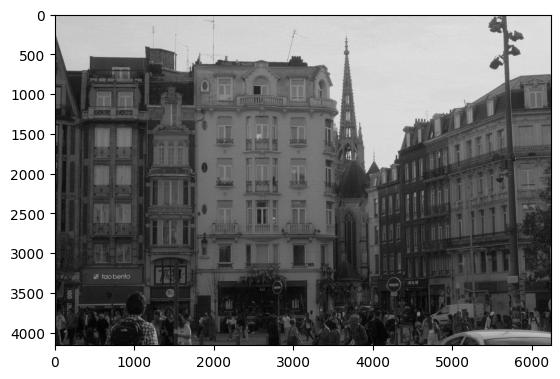

In [8]:

from numpy import zeros

newnp=zeros(image_np.shape[:2])
for i in range(image_np.shape[0]):
    for j in range(image_np.shape[1]):
        newnp[i,j] = 0.299*image_np[i,j,0] + 0.587*image_np[i,j,1] + 0.114*image_np[i,j,2] * 255

plt.imshow(newnp, cmap='gray')

## **1.3 Basic Operations: Pixel Manipulation and Filters**
**Theory**:  
- **Pixel manipulation**: Direct value changes.  
- **Filters**: Convolution (e.g., Gaussian blur).  
*Reference: Gonzalez & Woods, Chapter 3.*

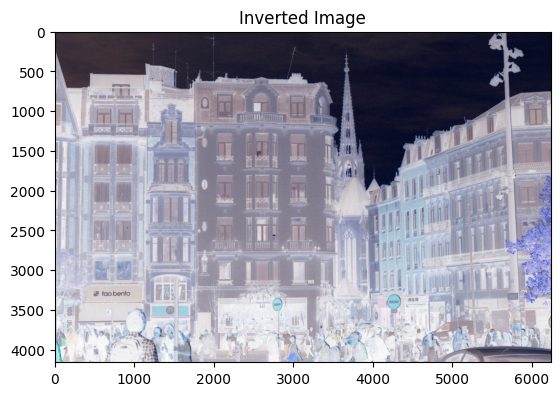

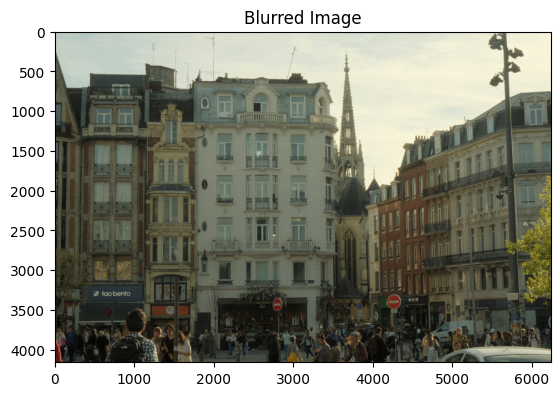

In [16]:
# Invert colors example
def invert_image(image):
    return 255 - image

inverted = invert_image(image_np)
plt.imshow(inverted, cmap='gray')
plt.title("Inverted Image")
plt.show()
# Gaussian blur example
try:
    image = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(image, (5,5), 0)
    plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
    plt.title("Blurred Image")
    plt.show()
except Exception as e:
    print("Blur example skipped (image not found).")

**Exercise 1.3**: Apply a Sobel edge detection kernel (3x3).

## **Solutions**

### **Exercise 1.1 Solution**

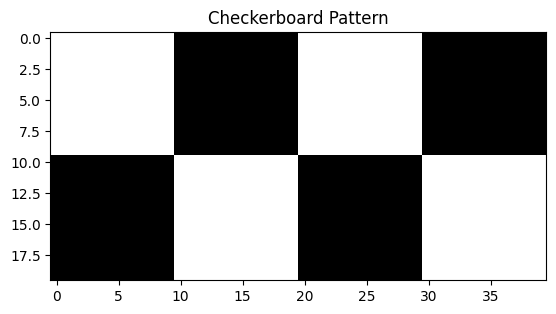

In [5]:
checkerboard = np.kron([[1, 0,1,0], [0, 1,0,1]], np.ones((10,10))) * 255
plt.imshow(checkerboard, cmap='gray')
plt.title("Checkerboard Pattern")
plt.show()

### **Exercise 1.2 Solution**

In [ ]:
def rgb_to_grayscale(image_np):
    return np.dot(image_np[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

gray_custom = rgb_to_grayscale(image_np)
plt.imshow(gray_custom, cmap='gray')
plt.title("Custom Grayscale Conversion")
plt.show()

### **Exercise 1.3 Solution**

In [ ]:
try:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    plt.imshow(np.absolute(sobel_x), cmap='gray')
    plt.title("Sobel Edge Detection (X-axis)")
    plt.show()
except Exception as e:
    print("Edge detection skipped (image not found).")

**References**:  
1. Gonzalez, R. C., & Woods, R. E. (2018). *Digital Image Processing*.  
2. Burger, W., & Burge, M. J. (2022). *Digital Image Processing*.